# Meghanjali Chennupati (U30308400)

## 1. Create 5 28x28 pixel images of the first letter of your first name to be used for training. For instance, if the first character of your name is K, then create 5 versions of K and save these as 5 different 28x28 images.


Answer:  I have created 5 versions of my First letter images . My first letter is M. I created with 28 x 28 pixel images. I saved with Media1, media 2, media 3, media 4, media 5 in jpg format.

## 2. Create a notebook. Load the MNIST dataset (see the tutorial from class) and the supplied autencoder (digits.a5). Display the predictions for several random digits and compare these to the original. 

# Load the libraries

In [81]:
import numpy as np

# Loading the MNIST data set and normalizing the data set 

In [82]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


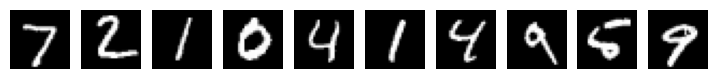

In [83]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

# Creating the autoencoder model

In [84]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 16)                1616      
                                                                 
 dense_12 (Dense)            (None, 100)               1700      
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

# Train the autoencoder model.

In [85]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 22s 43ms/step - loss: 0.1892 - val_loss: 0.1317
Epoch 2/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1224 - val_loss: 0.1150
Epoch 3/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1116 - val_loss: 0.1070
Epoch 4/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1055 - val_loss: 0.1034
Epoch 5/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1020 - val_loss: 0.1000
Epoch 6/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0995 - val_loss: 0.0988
Epoch 7/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0977 - val_loss: 0.0971
Epoch 8/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0964 - val_loss: 0.0961
Epoch 9/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0951 - val_loss: 0.0951
Epoch 10/10
469/469 [==============================] - 19s 40ms/step - loss: 0.094

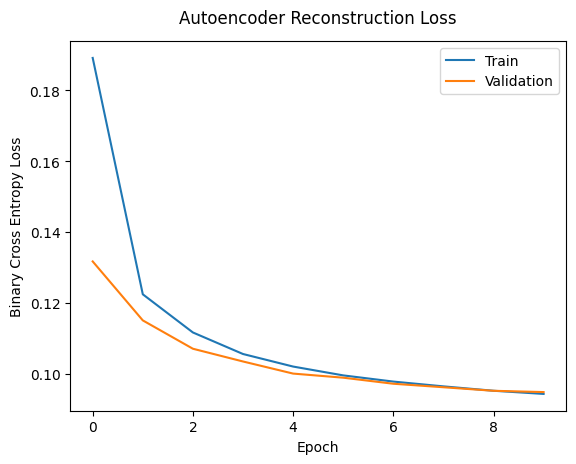

In [86]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

# Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 5ms/step


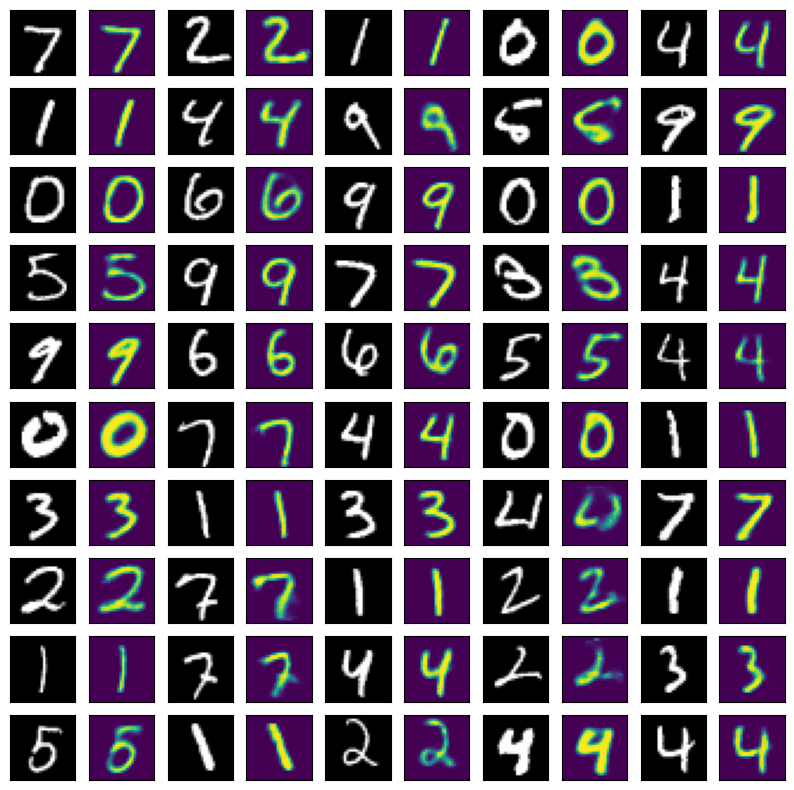

In [87]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

1/1 [==============================] - 0s 26ms/step
(1, 784)


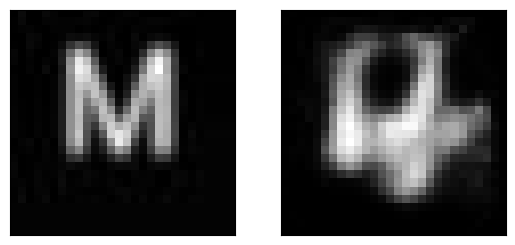

In [144]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media1.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Analysis:
1. Till now as per question 2 asked in assignment i have followed the tutorial notebook and loaded mnist data set and created and trained autoencoder model and tested the random digits it is performing good if we observe the above results it is clearly reconstructing the digits .

2. If we observe i have tested with my image it is not able to reconstruct my image since i didnot trained my image yet. so let us train my model with MNIST data set plus  my new images in furthur process

In [142]:
autoencoder.save('/content/drive/MyDrive/Autoencoders/initially_trained_autoencoder.h5')

# 3.Create a new autoencoder, and train this autoencoder with the MNIST dataset, with your new images added (don't forget to oversample these images. Add enough copies to the MNIST dataset so that your model can identify your new character).

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the MNIST data set normalizing and reshaping it

In [100]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


# Loading my all 5 images and normaliizng reshaping and storing in new_images numpy array

In [102]:
# Define target image size and color mode
target_size = (28, 28)
color_mode = "grayscale"
new_images = []
# Load 5 new images and display their predictions
for i in range(1, 6):
    # Load image
    img_path = f"/content/drive/MyDrive/Autoencoders/Media{i}.jpg"
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)

    # Convert image to array and normalize
    input_arr = image.img_to_array(img) / 255
    input_arr = input_arr.reshape(784)
    input_arr = np.array([input_arr])
    new_images.append(input_arr.reshape(784))

In [103]:

new_images = np.array(new_images)

# Duplicate new images to match size of MNIST dataset
new_images = np.repeat(new_images, 200, axis=0)


# Shuffling my new images array 

In [104]:
shuffle_idx = np.random.permutation(len(new_images))
new_images = new_images[shuffle_idx]


# My new images data shape

In [105]:
new_images.shape

(1000, 784)

# Selecting the 700 rows since i shuffled before i am taking 700 rows as training set

In [106]:
new_images_train=new_images[0:700,:]

In [107]:
new_images_train.shape

(700, 784)

# Selecting remaining as test set

In [108]:
new_images_test=new_images[len(new_images_train): ,:]

In [109]:
new_images_test.shape

(300, 784)

In [110]:
train_images.shape

(60000, 784)

In [111]:
test_images.shape

(10000, 784)

# The below is key step as i have total 4 numpy arrays 

1. train_images --   MNIST train data set.

2. test_images  --    MNIST test data set.

3. new_images_train  --  my 5 images train set.

4. new_images_test   --  my 5 images test set

# Now concatenating to a single array 

all_images_train -- contains train_images + new_images_train

all_images_test  -- contains test_images  + new_images_test

In [127]:
all_images_train = np.concatenate((train_images, new_images_train), axis=0)

# Verify the shape of the new array
print(all_images_train.shape)

(60700, 784)


In [126]:
all_images_test = np.concatenate((test_images, new_images_test), axis=0)

# Verify the shape of the new array
print(all_images_test.shape)

(10300, 784)


# Traning the autoencoder with new data set by creating new model

In [128]:
from tensorflow import keras
updated_model = keras.models.load_model('/content/drive/MyDrive/Autoencoders/initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=all_images_train, # For autoencoders, both the input and the target are the same
    y=all_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(all_images_test, all_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
475/475 [==============================] - 22s 43ms/step - loss: 0.0960 - val_loss: 0.0972
Epoch 2/15
475/475 [==============================] - 19s 39ms/step - loss: 0.0950 - val_loss: 0.0962
Epoch 3/15
475/475 [==============================] - 19s 39ms/step - loss: 0.0944 - val_loss: 0.0959
Epoch 4/15
475/475 [==============================] - 22s 45ms/step - loss: 0.0939 - val_loss: 0.0957
Epoch 5/15
475/475 [==============================] - 21s 44ms/step - loss: 0.0933 - val_loss: 0.0956
Epoch 6/15
475/475 [==============================] - 19s 41ms/step - loss: 0.0928 - val_loss: 0.0946
Epoch 7/15
475/475 [==============================] - 19s 39ms/step - loss: 0.0924 - val_loss: 0.0946
Epoch 8/15
475/475 [==============================] - 20s 42ms/step - loss: 0.0920 - val_loss: 0.0940
Epoch 9/15
475/475 [==============================] - 20s 41ms/step - loss: 0.0916 - val_loss: 0.0940
Epoch 10/15
475/475 [==============================] - 19s 40ms/step - loss: 0.091

# Reconstructng the data with concatenated data set

322/322 [==============================] - 2s 6ms/step


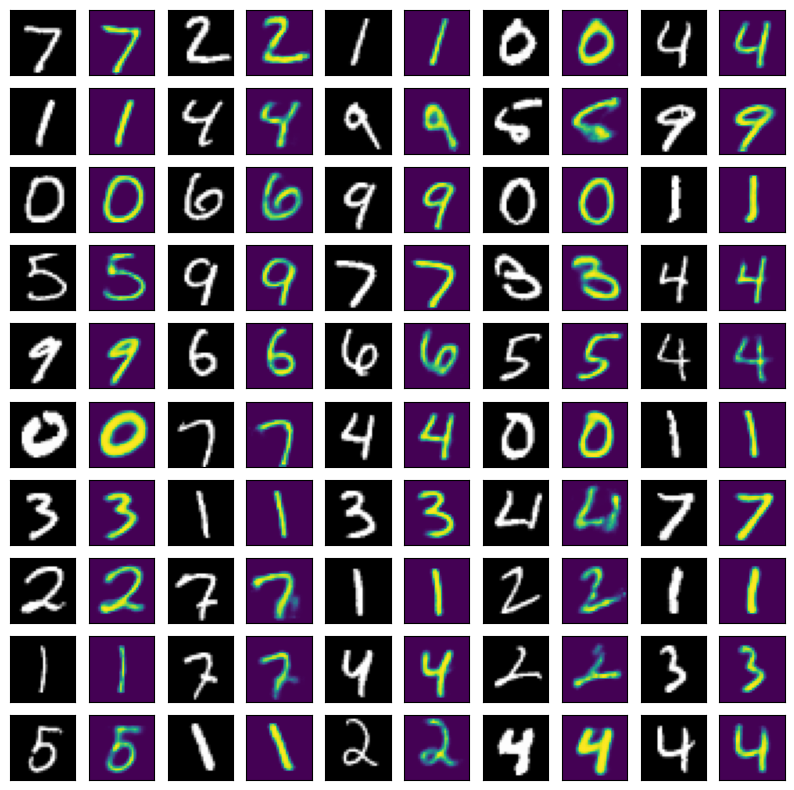

In [133]:
reconstructed_images = updated_model.predict(all_images_test)

images = []
for i in range(100):
    images.append(all_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Testing my new model with my 1st image

1/1 [==============================] - 0s 27ms/step
(1, 784)


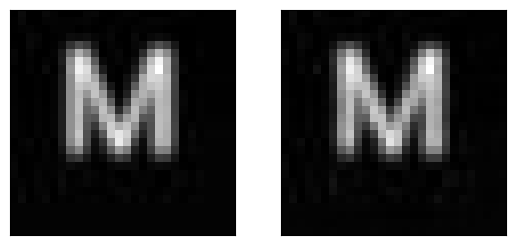

In [134]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media1.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing my new model with second image

1/1 [==============================] - 0s 24ms/step
(1, 784)


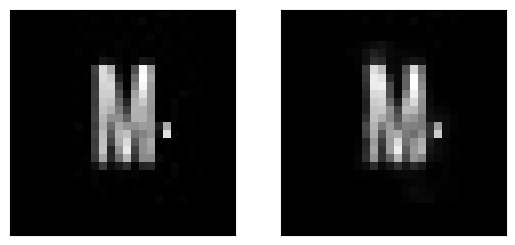

In [136]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media2.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing my new model with 3rd image

1/1 [==============================] - 0s 34ms/step
(1, 784)


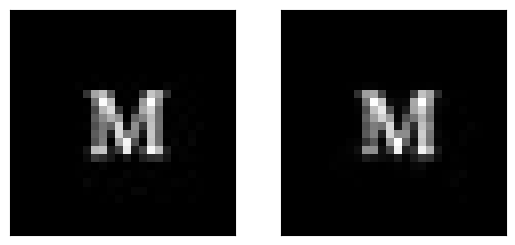

In [137]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media3.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing new model with 4th image

1/1 [==============================] - 0s 35ms/step
(1, 784)


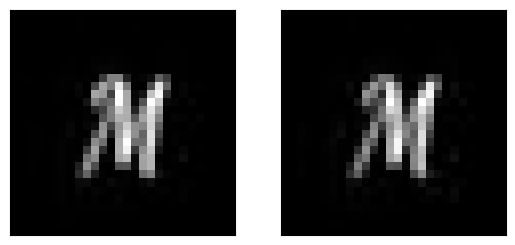

In [139]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media4.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing new model with 5th image

1/1 [==============================] - 0s 24ms/step
(1, 784)


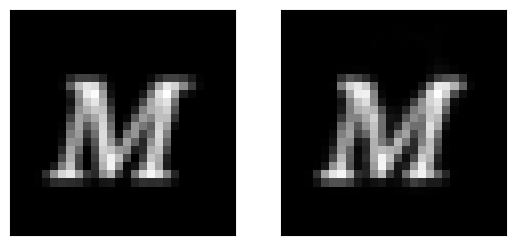

In [140]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media5.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Reconstructing my new model with my digits set

313/313 [==============================] - 2s 5ms/step


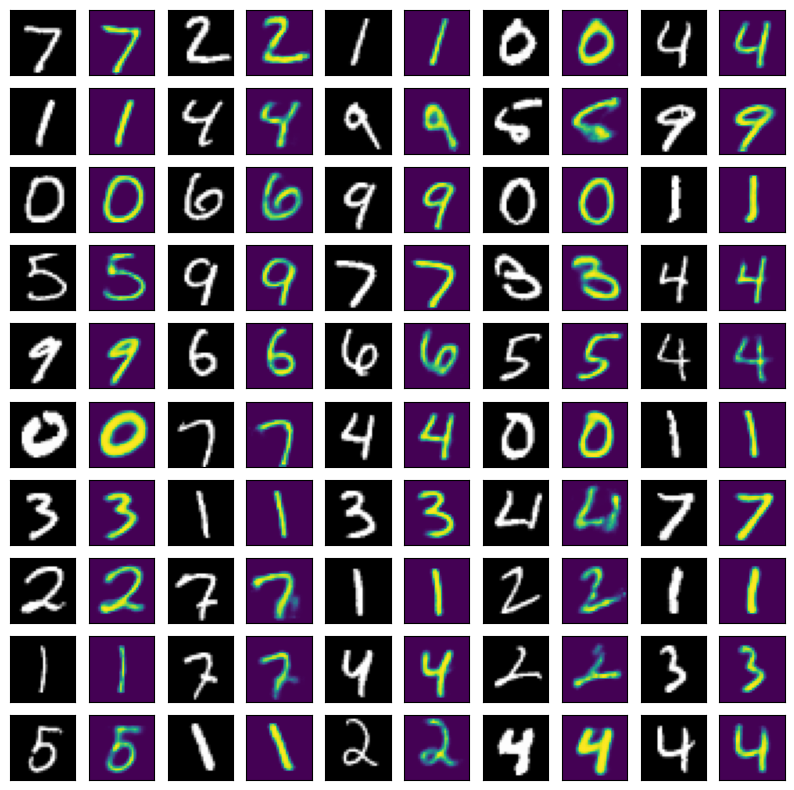

In [145]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Reconstructing my entire new images set with new model

10/10 [==============================] - 0s 6ms/step


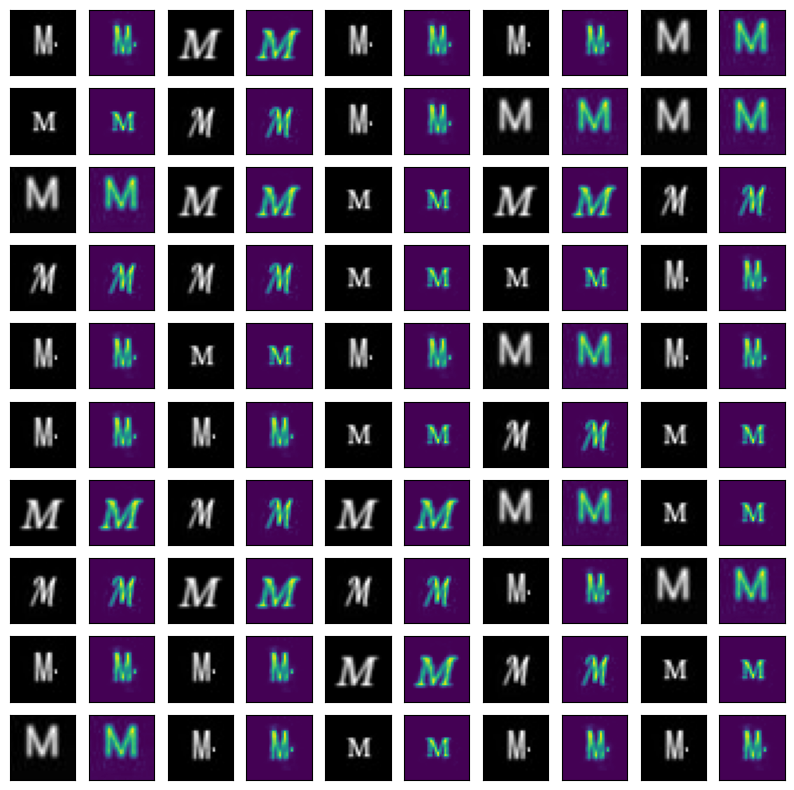

In [141]:
reconstructed_images = updated_model.predict(new_images_test)

images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Saving my new model ie: updated_model which is trained with both mnist and my new images as it is best model

In [143]:
updated_model.save('/content/drive/MyDrive/Autoencoders/final_best_model.h5')

# Analysis
1. As per the questions asked for the 3rd and 4th questions i have created a new autoencoder model by training with both mnist data set and also my new images .

2. Intially my model is trained only with mnist data set.

3. My intial model variable name is autoencoder which is saved in intially_trained_autoencoder.
4. So, old model is performing well on mnist digits i tested in the code.

5. Next i have first loaded my 5 images using loop and then reshaped and normalized it.
6. Next i shuffled it and then taken train and test sets with this shuffled array.
7. Next i concatenated with the mnist data set.
8. I trained with this concatenated data set for my new model and i tested with my new images .
9. It is performing well.
10. I reconstructed the the digits and whole data set and also my newimages set with new model.
11. It is performing well and u can visuilize in my code.
12. I saved my new model which is performing with concatenated set according to question that specified in assignment.
13. Varibales used.

1. old model variable name  =  autoencoder.
2. MNIST TRAIN SET = train_images
3. MNIST TEST SET = test_images.
4. my images train set = new_images_train
5. my images test set = new_images_test.
6. my images whole set = new_images.
7. Entire data set with mnist and my images = all_images_train, all_images_test.

##  Finally if u observe my new model updated_model is performing well on all_images_test (concatenated data set),test_images (mnist data set), new_images_test ( images data set).
